In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
os.chdir("/Users/anhthyngo/ds-projects/nfl-predict/")
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
csv = datadir + 'pbp-2019.csv'

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
data = pd.read_csv(csv)
data.head(2)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2019121200,2019-12-12,3,0,58,BAL,NYJ,0,0,85,NaN,1,NaN,0,"9-J.TUCKER EXTRA POINT IS GOOD, CENTER-46-M.COX, HOLDER-4-S.KOCH.",0,NaN,NaN,2019,0,UNDER CENTER,EXTRA POINT,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2019121200,2019-12-12,3,1,4,BAL,NYJ,2,20,67,NaN,1,NaN,0,"(1:04) (SHOTGUN) 8-L.JACKSON PASS DEEP LEFT TO 11-S.ROBERTS FOR 33 YARDS, TOUCHDOWN. LAMAR JACKSON'S 4TH TD PASS OF GAME AND 32ND OF SEASON.",0,NaN,NaN,2019,33,SHOTGUN,PASS,0,1,0,1,DEEP LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,33,OPP,0,NaN,0,NaN,0


In [4]:
list(data.columns)

['GameId',
 'GameDate',
 'Quarter',
 'Minute',
 'Second',
 'OffenseTeam',
 'DefenseTeam',
 'Down',
 'ToGo',
 'YardLine',
 'Unnamed: 10',
 'SeriesFirstDown',
 'Unnamed: 12',
 'NextScore',
 'Description',
 'TeamWin',
 'Unnamed: 16',
 'Unnamed: 17',
 'SeasonYear',
 'Yards',
 'Formation',
 'PlayType',
 'IsRush',
 'IsPass',
 'IsIncomplete',
 'IsTouchdown',
 'PassType',
 'IsSack',
 'IsChallenge',
 'IsChallengeReversed',
 'Challenger',
 'IsMeasurement',
 'IsInterception',
 'IsFumble',
 'IsPenalty',
 'IsTwoPointConversion',
 'IsTwoPointConversionSuccessful',
 'RushDirection',
 'YardLineFixed',
 'YardLineDirection',
 'IsPenaltyAccepted',
 'PenaltyTeam',
 'IsNoPlay',
 'PenaltyType',
 'PenaltyYards']

In [5]:
data['PassType'].unique()

array([nan, 'DEEP LEFT', 'SHORT MIDDLE', 'SHORT LEFT', 'DEEP RIGHT',
       'SHORT RIGHT', 'DEEP MIDDLE', 'MIDDLE. PENALTY', 'LEFT TO',
       'BACK TO', 'MIDDLE TO', 'YARDS &'], dtype=object)

In [6]:
data['RushDirection'].unique()

array([nan, 'LEFT TACKLE', 'CENTER', 'RIGHT END', 'RIGHT TACKLE',
       'LEFT END', 'LEFT GUARD', 'RIGHT GUARD'], dtype=object)

In [7]:
data[data['PassType']=='MIDDLE TO']['Description']

28172    (11:16) (SHOTGUN) 11-C.WENTZ PASS INCOMPLETE MIDDLE TO 13-N.AGHOLOR (92-B.URBAN).
Name: Description, dtype: object

In [8]:

data[data['PassType']=='LEFT TO']['Description']

8830    (2:36) (SHOTGUN) 11-C.WENTZ PASS INCOMPLETE LEFT TO 19-J.ARCEGA-WHITESIDE (92-K.STRONG).
Name: Description, dtype: object

In [9]:
data[data['PassType']=='BACK TO']['Description']

15034    (4:20) (PUNT FORMATION) 6-B.KERN PUNTS 49 YARDS TO JAX 33, CENTER-48-B.BRINKLEY. 12-D.WESTBROOK TO JAX 29 FOR -4 YARDS. PASS BACK TO 84-K.COLE TO JAX 29 FOR NO GAIN (37-A.HOOKER).
Name: Description, dtype: object

In [10]:
data = data[(data['PassType'] != 'MIDDLE. PENALTY') &
     (data['PassType'] != 'LEFT TO') &
     (data['PassType'] != 'BACK TO') &
     (data['PassType'] != 'MIDDLE TO') &
     (data['PassType'] != 'YARDS &')
    ]

In [11]:
## Calculated Column for Run/Pass play types
data = data.assign(PlayLoc=np.where(data['PassType'].isnull(), data['RushDirection'], data['PassType']))


In [12]:
data[['PlayType','PassType','RushDirection','PlayLoc']].head(10)

,PlayType,PassType,RushDirection,PlayLoc
0,EXTRA POINT,NaN,NaN,NaN
1,PASS,DEEP LEFT,NaN,DEEP LEFT
2,NO PLAY,NaN,NaN,NaN
3,SCRAMBLE,NaN,NaN,NaN
4,RUSH,NaN,LEFT TACKLE,LEFT TACKLE
5,EXTRA POINT,NaN,NaN,NaN
6,PASS,SHORT MIDDLE,NaN,SHORT MIDDLE
7,PASS,SHORT LEFT,NaN,SHORT LEFT
8,RUSH,NaN,CENTER,CENTER
9,PASS,SHORT MIDDLE,NaN,SHORT MIDDLE


NFL has become more of a passing league, so it's not a surprise that short passes are the most common plays.

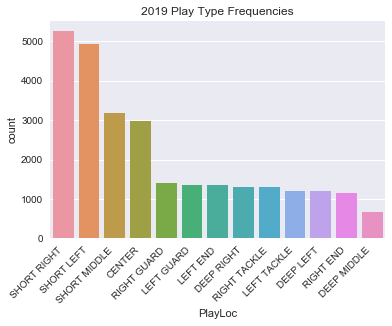

In [13]:
sns.countplot(data['PlayLoc'],order = data['PlayLoc'].value_counts().index)
plt.title("2019 Play Type Frequencies")
plt.xticks(rotation=45, ha='right')
plt.show()

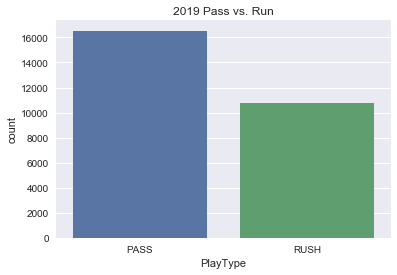

In [14]:
rp = data[(data['PlayType'] == 'RUSH') | (data['PlayType'] == 'PASS')]
sns.countplot(rp['PlayType'])
plt.title("2019 Pass vs. Run")
plt.show()

In [15]:
print(rp['Down'].unique())
## remove down 0, which is basically extra points, etc.
rp = rp[rp['Down'] != 0]

[2 1 3 4 0]


1st down seems to be evenly distributed between Pass/Rush. 2nd down becomes more favorable towards the pass. Third down is even more favorable.

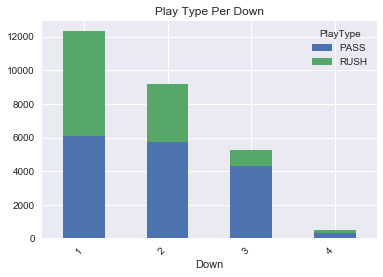

In [16]:
rp.groupby(['Down', 'PlayType']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Play Type Per Down')
plt.xticks(rotation=45, ha='right')
plt.show()

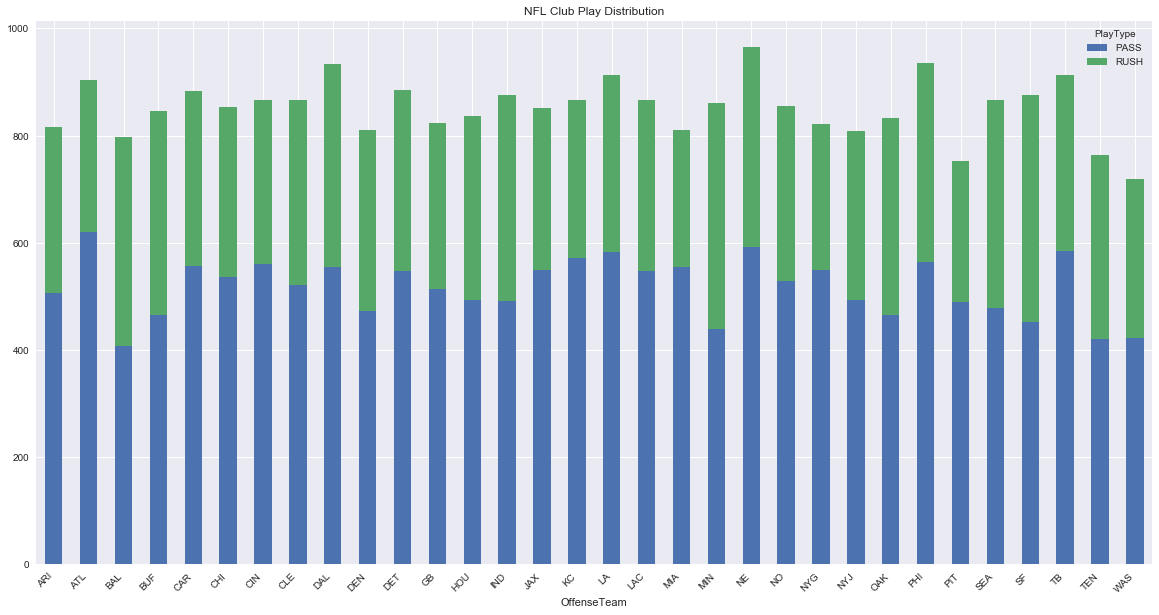

In [17]:
rp.groupby(['OffenseTeam', 'PlayType']).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("NFL Club Play Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

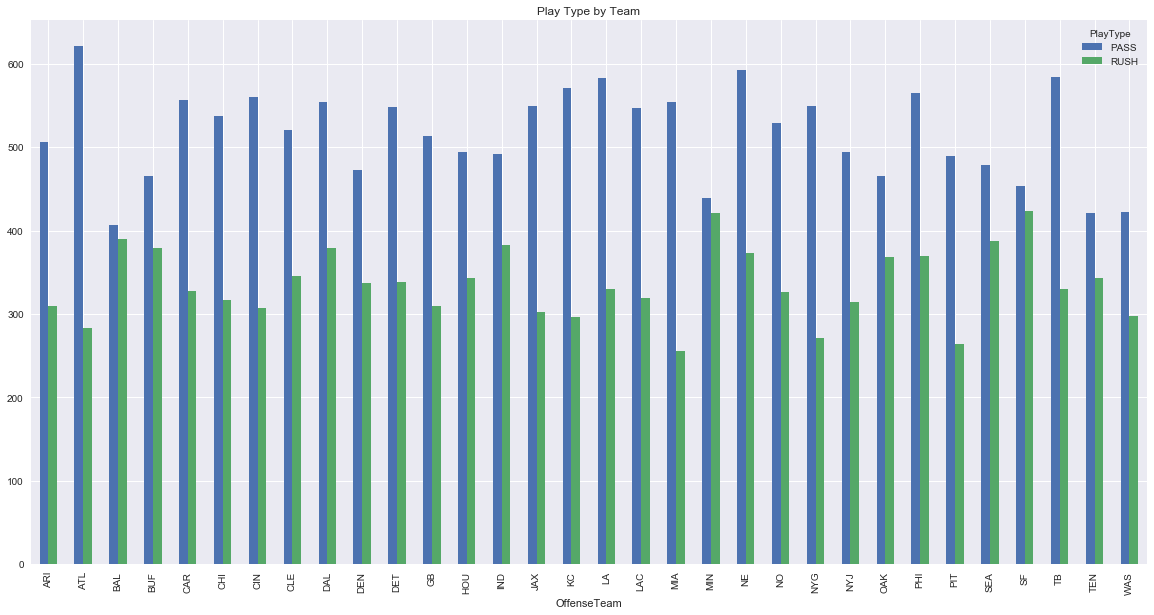

In [18]:
rp.groupby(['OffenseTeam', 'PlayType']).size().unstack().plot(kind='bar',figsize=(20,10))
plt.title("Play Type by Team")
plt.show()